# Importing Dataset

In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Inspecting the dataset

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(train_df.shape)

(891, 12)


### Separating input features from predictions

In [5]:
train_X = train_df.loc[:,'Pclass':]
test_X = test_df.loc[:,'Pclass':]
train_X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_Y = train_df.loc[:,'Survived']
train_Y.head()
train_Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Feature Selection and Data Cleaning

### Printing out the unique values of each feature

In [7]:
for c in train_X:
  print("Feature name:", c)
  print(train_X[c].unique(), "\n\n\n")

Feature name: Pclass
[3 1 2] 



Feature name: Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles 

Just looking at the features and their unique values, we can eliminate some from contention. First off, we can't do anything with the names - there's no obvious way to convert them to numerical input, and any information gained from a name could also be gained by the combination of pclass, sex, and the sibling data. Next off the list is the ticket number - I have no intuition about what any of these ticket numbers mean, and I think they could be messy when it comes to training our model as there doesn't seem to be any correlation.

Cabin number is interesting. I definitely think cabin locations as well as levels of the boat (I'm guessing?) could have an impact on the survivability of passengers during the sinking. However, the data is very messy, there are loads of nan values with no obvious way to replace them (can't do mean or mode replacement, etc.) and lots of error values (ex: T, F G63, D, etc.). All of this said, I think the cons outweigh the pros - particularly since I'm hoping pclass and fare amount will lead to the same information gain (i.e. more expensive tickets, better cabins, better location, yada yada...)

So this leaves us with:
*   pclass
*   sex
*   age
*   sibsp
*   parch
*   fare
*   embarked

As our final features to investigate



In [8]:
# Removing obviously unhelpful features
import copy

tr_X = copy.deepcopy(train_X)
tr_X = tr_X.drop('Name', 1)
tr_X = tr_X.drop('Ticket', 1)
tr_X = tr_X.drop('Cabin', 1)

t_X = copy.deepcopy(test_X)
t_X = t_X.drop('Name', 1)
t_X = t_X.drop('Ticket', 1)
t_X = t_X.drop('Cabin', 1)

tr_X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop e

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
for c in tr_X:
  print("Feature name:", c)
  print(tr_X[c].unique(), "\n\n\n")

Feature name: Pclass
[3 1 2] 



Feature name: Sex
['male' 'female'] 



Feature name: Age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] 



Feature name: SibSp
[1 0 3 4 2 5 8] 



Feature name: Parch
[0 1 2 5 3 4 6] 



Feature name: Fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708 

In [10]:
from math import isnan

# Coding male as 0, female as 1
tr_X['Sex'] = tr_X['Sex'].apply(
    lambda x: 0 if x == 'male' else 1)

t_X['Sex'] = t_X['Sex'].apply(
    lambda x: 0 if x == 'male' else 1)

# Assume age is normally distributed, we'll use mean replacement
tr_X['Age'] = tr_X['Age'].replace(float("nan"), tr_X['Age'].mean())
t_X['Age'] = t_X['Age'].replace(float("nan"), t_X['Age'].mean())

# Mode replacement for embarked, coding in order of pickup
tr_X['Embarked'] = tr_X['Embarked'].replace(float("nan"), 'S')
tr_X['Embarked'] = tr_X['Embarked'].replace('S', 1)
tr_X['Embarked'] = tr_X['Embarked'].replace('C', 2)
tr_X['Embarked'] = tr_X['Embarked'].replace('Q', 3)
t_X['Embarked'] = tr_X['Embarked'].replace('S', 1)
t_X['Embarked'] = tr_X['Embarked'].replace('C', 2)
t_X['Embarked'] = tr_X['Embarked'].replace('Q', 3)

### Performing F-tests and Mutual Information tests



In [11]:
fs_names = []
for c in tr_X:
  fs_names.append(c)

np_X = np.array(tr_X)
t_X = np.array(t_X)
print("Number of features:", np_X.shape)

Number of features: (891, 7)


In [12]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif
import matplotlib.pyplot as plt

mutual_info = mutual_info_classif(np_X, train_Y, discrete_features=[1,1,0,1,1,0,1])
f_test, _ = f_classif(np_X, train_Y)

In [13]:
def print_MI_results(fs_names, mutual_info):
    # Mutual information results
    print("Mutual Information by index: ", mutual_info)
    fig = plt.figure()
    fig.set_size_inches(14.5, 8.5)
    plt.bar(fs_names, mutual_info)
    plt.title("Features vs. Mutual Information")
    plt.xlabel("Feature")
    plt.xticks(rotation=45)
    plt.ylabel("Mutual Information Value")
    plt.show()

Mutual Information by index:  [0.05810725 0.15087049 0.0443512  0.01439828 0.00052697 0.13608563
 0.00601794]


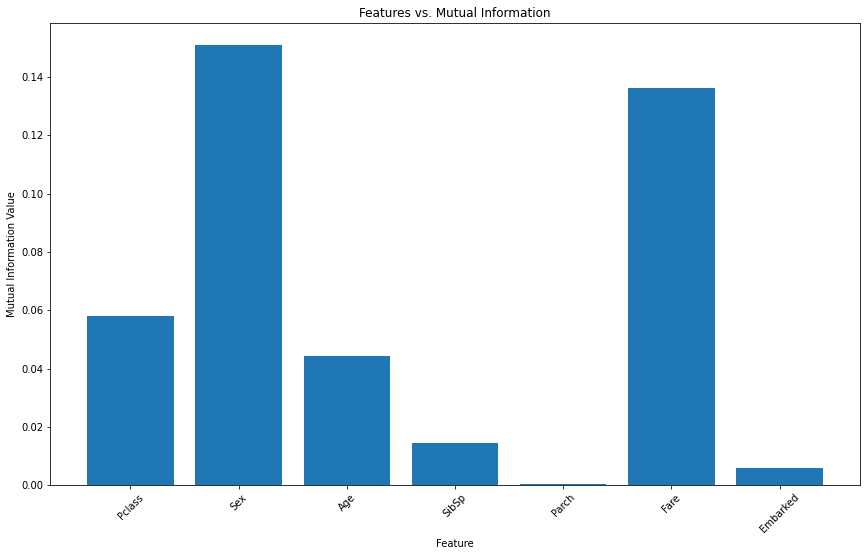

In [14]:
print_MI_results(fs_names, mutual_info)

In [15]:
def print_ftest_results(fs_names, f_test):
    # F-test results
    print("F-values by index: ", f_test)
    fig = plt.figure()
    fig.set_size_inches(14.5, 8.5)
    plt.bar(fs_names, f_test)
    plt.title("Features vs. F-Test value")
    plt.xlabel("Feature")
    plt.xticks(rotation=45)
    plt.ylabel("F-value")
    plt.show()

F-values by index:  [115.03127219 372.4057236    4.35351609   1.1105722    5.96346384
  63.03076423  10.25935513]


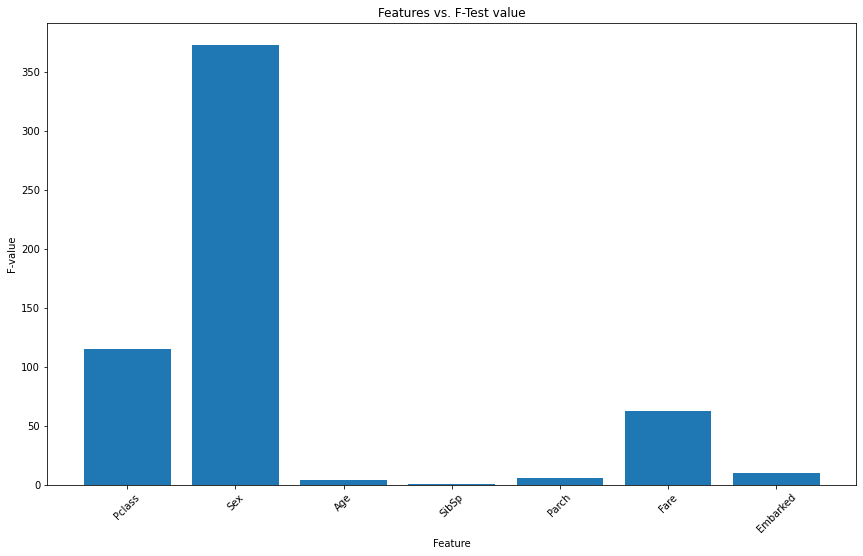

In [16]:
print_ftest_results(fs_names, f_test)

In [17]:
import seaborn as sn

def create_correlation_matrix(feature_cols, feature_names, feature_target):
    corr_df = pd.DataFrame(feature_cols, columns=feature_names)
    corr_df['Survived'] = feature_target
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    corr_matrix = corr_df.corr()
    sn.heatmap(corr_matrix, annot=True)
    plt.show()

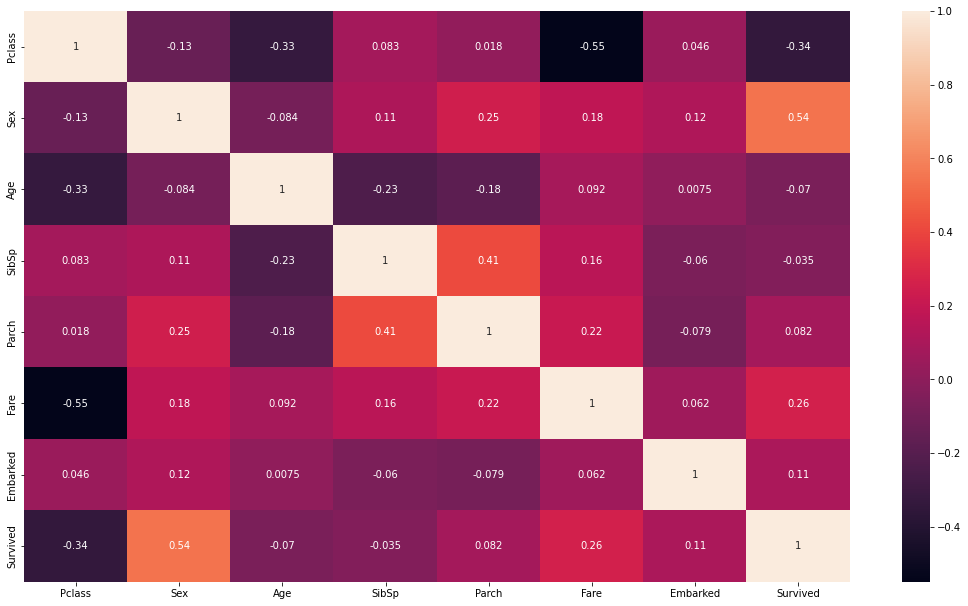

In [18]:
create_correlation_matrix(np_X, fs_names, train_Y)

Given the results from the F-test, MI test, and correlation matrix, I think all of the selected features do provide information for analysis, and I don't want to be overly reliant on only the key features, so I will use all seven for our learning models

# Normalizing data and creating train, test, val datasets

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import math

def create_train_test_sets(X, Y):
    features = copy.deepcopy(X)
    # Normalizing age and fare
    std_scal = StandardScaler()

    means = []
    vars = []

    # Age
    features[:,2] = std_scal.fit_transform(features[:,2].reshape(-1,1)).flatten()
    means.append(std_scal.mean_)
    vars.append(std_scal.var_)

    # Fare
    features[:,5] = std_scal.fit_transform(features[:,5].reshape(-1,1)).flatten()
    means.append(std_scal.mean_)
    vars.append(std_scal.var_)

    # Creating val and training sets
    x_train, x_val, y_train, y_val = train_test_split(features, Y, test_size=0.15, random_state=47)

    y_train = np.array(y_train)
    y_val = np.array(y_val)

    # Converting sets to tensors
    x_train = np.array(x_train.astype(np.float32), ndmin=2)
    x_val = np.array(x_val.astype(np.float32), ndmin=2)
    y_train = np.around(y_train.astype(np.float32))
    y_val = np.around(y_val.astype(np.float32))
    
    data_sets = {
        "x_train" : x_train,
        "x_val" : x_val,
        "y_train" : y_train,
        "y_val" : y_val, 
    }

    return data_sets, means, vars

In [81]:
data_sets, means, vars = create_train_test_sets(np_X, train_Y)

# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(data_sets["x_train"], data_sets["y_train"])
train_p = lr.predict(data_sets["x_train"])
test_p = lr.predict(data_sets["x_val"])
print("Accuracy on the training set:", accuracy_score(data_sets["y_train"], train_p))
print("Accuracy on the val set:", accuracy_score(data_sets["y_val"], test_p))

Accuracy on the training set: 0.8071334214002642
Accuracy on the val set: 0.7985074626865671


In [20]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Again, but with stratified K-fold

features = copy.deepcopy(np_X)
s_scal = StandardScaler()
# Normalizing features
# Age
features[:,2] = s_scal.fit_transform(features[:,2].reshape(-1,1)).flatten()

# Fare
features[:,5] = s_scal.fit_transform(features[:,5].reshape(-1,1)).flatten()

lr = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(lr, features, train_Y, cv=skf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.79329609 0.78651685 0.79213483 0.76966292 0.8258427 ]
Average Cross Validation score :0.7934906785512522


# NN From Scratch

In [21]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z)), Z

In [22]:
def relu(Z):
    return np.maximum(Z, 0, Z), Z

In [23]:
import h5py

# Initialize Parameters
def initialize_parameters(layer_dims):
    np.random.seed(6)
    parameters = {}

    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2./layer_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [24]:
# Linear Forward
def linear_forward(A, W, b):
    Z = np.dot(W,A) + b
    cache = (A, W, b)

    return Z, cache

In [25]:
# Linear Activation Forward
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
      
    cache = (linear_cache, activation_cache)
    return A, cache

In [26]:
# L-layer Forward
def L_model_forward(X, parameters):
    caches = []

    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)

    return AL, caches

In [27]:
# Cost Function - cross-entropy cost
# J = -1/m * SUM_1_m(y_i * log(a_i) + (1 - y_i)*log(1 - a_i))

def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = -1/m*np.dot(np.append(Y,(1-Y)), np.append(np.log(AL),np.log(1-AL)).T)

    cost = np.squeeze(cost)

    return cost

In [28]:
def compute_cost_with_regularization(AL, Y, parameters, lambd):
    m = Y.shape[1]
    L = len(parameters) // 2

    cross_entropy_cost = compute_cost(AL, Y)

    reg_term = np.sum(np.square(parameters['W1']))
    for l in range(2, L):
        reg_term += np.sum(np.square(parameters['W' + str(l)]))
    L2_regularization_cost = 1/m*(lambd/2) * reg_term

    return cross_entropy_cost + L2_regularization_cost

In [29]:
# linear backward

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1/m*np.dot(dZ, A_prev.T)
    db = 1/m*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

In [30]:
def linear_backward_with_regularization(dZ, cache, lambd):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dA_prev, dW, db = linear_backward(dZ, cache)
    return dA_prev, dW + (lambd/m)*W, db

In [31]:
# sigmoid backward
def sigmoid_backward(dA, activation_cache):
    s = sigmoid(activation_cache)[0]
    dZ = dA * s * (1 - s)
    assert(activation_cache.shape == dZ.shape)
    return dZ

In [32]:
# relu backward
def relu_backward(dA, activation_cache):
    dZ = np.copy(dA)
    dZ[activation_cache <= 0] = 0

    assert(dZ.shape == activation_cache.shape)
    return dZ

In [33]:
# linear activation backward

def linear_activation_backward(dA, cache, activation, lambd=0.001):
    linear_cache, activation_cache = cache

    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
        # dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
        # dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [34]:
# L model backward

def L_model_backward(AL, Y, caches, lambd=0.001):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L - 1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, 'sigmoid', lambd)
    grads['dA' + str(L - 1)] = dA_prev_temp
    grads['dW' + str(L)] = dW_temp
    grads['db' + str(L)] = db_temp

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l + 1)], current_cache, 'relu', lambd)
        grads['dA' + str(l)] = dA_prev_temp
        grads['dW' + str(l + 1)] = dW_temp
        grads['db' + str(l + 1)] = db_temp
    
    return grads

In [35]:
# Update parameters

def update_parameters(params, grads, learning_rate):
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters['W' + str(l + 1)] = parameters['W' + str(l + 1)] - learning_rate * grads['dW' + str(l + 1)]
        parameters['b' + str(l + 1)] = parameters['b' + str(l + 1)] - learning_rate * grads['db' + str(l + 1)]
    
    return parameters

In [36]:
# Creating and training model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 30000, print_cost = False, lambd=0.01):
    costs = []

    parameters = initialize_parameters(layers_dims)

    for i in range(num_iterations):
        AL, caches = L_model_forward(X, parameters)

        cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
        # cost = compute_cost(AL, Y, parameters)

        grads = L_model_backward(AL, Y, caches, lambd)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [37]:
# Predict function

def predict(X, Y, parameters):
    AL, caches = L_model_forward(X, parameters)
    predictions = (AL > 0.5)

    result = (predictions == Y)

    print("Accuracy:", np.sum(result)/Y.shape[1])

In [38]:
# Dictionary to vector

# Credit: deeplearning.ai on Coursera
def dictionary_to_vector(parameters):
    """
    Roll all our parameters dictionary into a single vector satisfying our specific required shape.
    """
    keys = []
    count = 0
    for key in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        
        # flatten parameter
        new_vector = np.reshape(parameters[key], (-1,1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta, keys

# Vector to dictionary

# Credit: deeplearning.ai on Coursera
def vector_to_dictionary(theta):
    """
    Unroll all our parameters dictionary from a single vector satisfying our specific required shape.
    """
    parameters = {}
    parameters["W1"] = theta[:56].reshape((8,7))
    parameters["b1"] = theta[56:64].reshape((8,1))
    parameters["W2"] = theta[64:128].reshape((8,8))
    parameters["b2"] = theta[128:136].reshape((8,1))
    parameters["W3"] = theta[136:144].reshape((1,8))
    parameters["b3"] = theta[144:145].reshape((1,1))

    return parameters

# Gradients to vector

# Credit: deeplearning.ai on Coursera
def gradients_to_vector(gradients):
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3"]:
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta


In [39]:
# Credit: deeplearning.ai on Coursera

def gradient_check_n(parameters, gradients, X, Y, epsilon=1e-7, print_msg=False):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        #(approx. 3 lines)
        # theta_plus =                                        # Step 1
        # theta_plus[i] =                                     # Step 2
        # J_plus[i], _ =                                     # Step 3
        # YOUR CODE STARTS HERE
        theta_plus = np.copy(parameters_values)
        theta_plus[i] += epsilon
        AL, _ = L_model_forward(X, vector_to_dictionary(theta_plus))
        J_plus[i] = compute_cost(AL, Y)
        
        # YOUR CODE ENDS HERE
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        #(approx. 3 lines)
        # theta_minus =                                    # Step 1
        # theta_minus[i] =                                 # Step 2        
        # J_minus[i], _ =                                 # Step 3
        # YOUR CODE STARTS HERE
        theta_minus = np.copy(parameters_values)
        theta_minus[i] -= epsilon
        AL, _ = L_model_forward(X, vector_to_dictionary(theta_minus))
        J_minus[i] = compute_cost(AL, Y)
        
        # YOUR CODE ENDS HERE
        
        # Compute gradapprox[i]
        # (approx. 1 line)
        # gradapprox[i] = 
        # YOUR CODE STARTS HERE
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
        
        # YOUR CODE ENDS HERE
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    # (approx. 3 line)
    # numerator =                                             # Step 1'
    # denominator =                                           # Step 2'
    # difference =                                            # Step 3'
    # YOUR CODE STARTS HERE
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference = numerator/denominator
    
    # YOUR CODE ENDS HERE
    if print_msg:
        if difference > 2e-7:
            print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
        else:
            print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")

    return difference

Cost after iteration 0: 0.8269792877978058
Cost after iteration 1000: 0.6237998180093185
Cost after iteration 2000: 0.5729565744633431
Cost after iteration 3000: 0.547192470457425
Cost after iteration 4000: 0.5323870443910309
Cost after iteration 5000: 0.5236421882151914
Cost after iteration 6000: 0.5173879604786437
Cost after iteration 7000: 0.512643429714539
Cost after iteration 8000: 0.5084488852866219
Cost after iteration 9000: 0.5049310652225495
Cost after iteration 10000: 0.5019049184475723
Cost after iteration 11000: 0.4992774418481202
Cost after iteration 12000: 0.49662015805557286
Cost after iteration 13000: 0.49437356681170785
Cost after iteration 14000: 0.49228275959467016
Cost after iteration 15000: 0.49024985841002966
Cost after iteration 16000: 0.488290061217301
Cost after iteration 17000: 0.48636320098334085
Cost after iteration 18000: 0.48439283880247846
Cost after iteration 19000: 0.48252330403989774
Cost after iteration 20000: 0.48065094837285605
Cost after iteration 

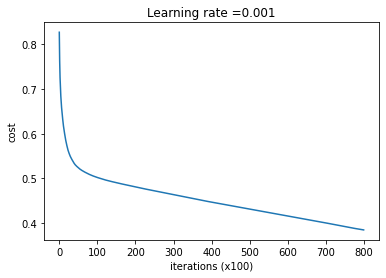

In [70]:
X = np.array(data_sets['x_train']).T
Y = np.array(data_sets['y_train'], ndmin=2)

learning_rate = 0.008

parameters, costs = L_layer_model(X, Y, [7, 32, 32, 32, 32, 8, 1], learning_rate, num_iterations = 30000, print_cost = True, lambd=20.0)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (x100)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [83]:
p = initialize_parameters([7,8,8,1])
AL, caches = L_model_forward(X, p)
grads = L_model_backward(AL, Y, caches, lambd=0.)

gradient_check_n(p, grads, X, Y, print_msg=True)

Your backward propagation works perfectly fine! difference = 1.0680073896345803e-08


1.0680073896345803e-08

In [71]:
predict(X, Y, parameters)

val_X = np.array(data_sets['x_val']).T
val_Y = np.array(data_sets['y_val'], ndmin=2)

predict(val_X, val_Y, parameters)

Accuracy: 0.8821548821548821


# Running it on the test set for submission

In [76]:
def normalize_test_set(X, means, vars):
    features = copy.deepcopy(X)
    # Normalizing age and fare
    # Age
    features[:,2] = (features[:,2] - means[0][0])/np.sqrt(vars[0][0])

    # Fare
    features[:,5] = (features[:,5] - means[1][0])/np.sqrt(vars[1][0])

    return features

In [77]:
X_test = normalize_test_set(t_X, means, vars)
X_test[10,:]

array([ 3.        ,  0.        ,  0.04413122,  0.        ,  0.        ,
       -0.48944219,  1.        ])

In [78]:
def predict_test(X, parameters):
    AL, caches = L_model_forward(X, parameters)
    predictions = (AL > 0.5)
    res = np.append(np.array(test_df['PassengerId']), predictions)
    res = res.reshape(2,418).T
    pd.DataFrame(res).to_csv('result.csv')

In [79]:
predict_test(X_test.T, parameters)